<a href="https://colab.research.google.com/github/Kiarashmo/Stroke-Patient-Motor-Imagery-Classification-System-by-Utilizing-Transfer-Learning/blob/main/Frequency_Band_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pywt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_healthy_data_path = '/content/drive/MyDrive/NMA2023_DL/Healthy_Dataset'
healthy_data_path = f'{base_healthy_data_path}/mi_channels'
healthy_data_path_processed = f'{base_healthy_data_path}/mi_channels_gamma'

base_stroke_data_path = '/content/drive/MyDrive/NMA2023_DL/Stroke_Dataset'
stroke_data_path = f'{base_stroke_data_path}/mi_channels'
stroke_data_path_processed = f'{base_stroke_data_path}/mi_channels_gamma'

import os
os.makedirs(healthy_data_path_processed, exist_ok=True)
os.makedirs(stroke_data_path_processed, exist_ok=True)

In [ ]:
def get_wt_data(data_folder, processed_data_path, n_subjects):

  for i in range(1, n_subjects+1):
    data_and_labels = np.load(f"{data_folder}/subject{i:03}.npz")

    data = data_and_labels['data']
    labels = data_and_labels['labels']

    # Gamma selection
    data_wt = pywt.WaveletPacket(data, wavelet='db1', maxlevel = 2)

    data_path = f'{processed_data_path}/subject{i:03}.npz'
    np.savez(data_path, data=data, labels=labels)


In [ ]:
get_wt_data(healthy_data_path, healthy_data_path_processed, 109)
get_wt_data(stroke_data_path, stroke_data_path_processed, 50)

FileNotFoundError: ignored

In [ ]:
data_and_labels = np.load(f"{healthy_data_path_processed}/subject001.npz")
data = data_and_labels['data']
labels = data_and_labels['labels']
print("data shape:", data.shape)
print("labels shape:", labels.shape)

data shape: (45, 19, 640)
labels shape: (45,)


### Playground

In [ ]:
x = data_wt['dd'].data
y = data_wt['aa'].data
(data_wt['dd'].data).shape

(4872, 19, 160)

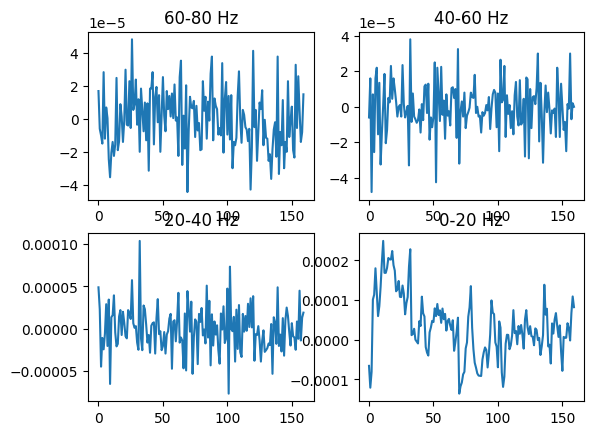

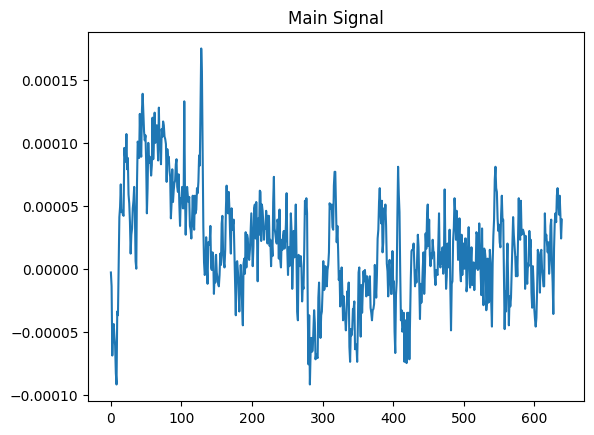

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.plot((data_wt['dd'].data)[10,10,:])
plt.title('60-80 Hz')
plt.subplot(2,2,2)
plt.plot((data_wt['da'].data)[10,10,:])
plt.title('40-60 Hz')
plt.subplot(2,2,3)
plt.plot((data_wt['ad'].data)[10,10,:])
plt.title('20-40 Hz')
plt.subplot(2,2,4)
plt.plot((data_wt['aa'].data)[10,10,:])
plt.title('0-20 Hz')
plt.show()

plt.figure()
plt.plot(dataset[10,10,:])
plt.title('Main Signal')
plt.show()

In [ ]:
# Store data and labels in file

# data_wt= (data_wt['dd'].data)

data_path = '/content/drive/MyDrive/NMA2023_DL/Healthy_Dataset/data_Gamma.npy'



In [ ]:
dscdsc = np.load(data_path)

In [ ]:
sum(sum(dscdsc==data_wt))

array([[4872, 4872, 4872, ..., 4872, 4872, 4872],
       [4872, 4872, 4872, ..., 4872, 4872, 4872],
       [4872, 4872, 4872, ..., 4872, 4872, 4872],
       ...,
       [4872, 4872, 4872, ..., 4872, 4872, 4872],
       [4872, 4872, 4872, ..., 4872, 4872, 4872],
       [4872, 4872, 4872, ..., 4872, 4872, 4872]])